<a href="https://colab.research.google.com/github/shauryapanhale/skill2/blob/main/skill_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/shauryapanhale/skill2.git"

Cloning into 'skill2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv(r"/content/drive/MyDrive/hi.csv")
df.head(200)


df.dropna(axis=0,inplace=True)
print(df)

print("info")
print(df.info())

print("describe")
print(df.describe())

print("IS NULL any")
print(df.isnull().any())
print("isnullsum")
print(df.isnull().sum())
print("duplicated")
print(df.duplicated())
print("drop duplicates")
print(df.drop_duplicates(inplace=True))
print("DROPNA")
print(df.dropna(inplace=True))
output_path = '/content/drive/My Drive/hi2.csv'
df.to_csv(output_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level  \
0       69  Female        1                    0                Moderate   
1       32    Male        0                    0                Moderate   
2       89    Male        0                    1                Moderate   
3       78    Male        0                    1                Moderate   
4       38  Female        1                    0                Moderate   
...    ...     ...      ...                  ...                     ...   
49995   21    Male        0                    0                     Low   
49996   35  Female        0                    0                     Low   
49997   46    Male        0                    1                    High   
49998   56    Male        0                    1                     Low   
49999   72    Male        0        

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


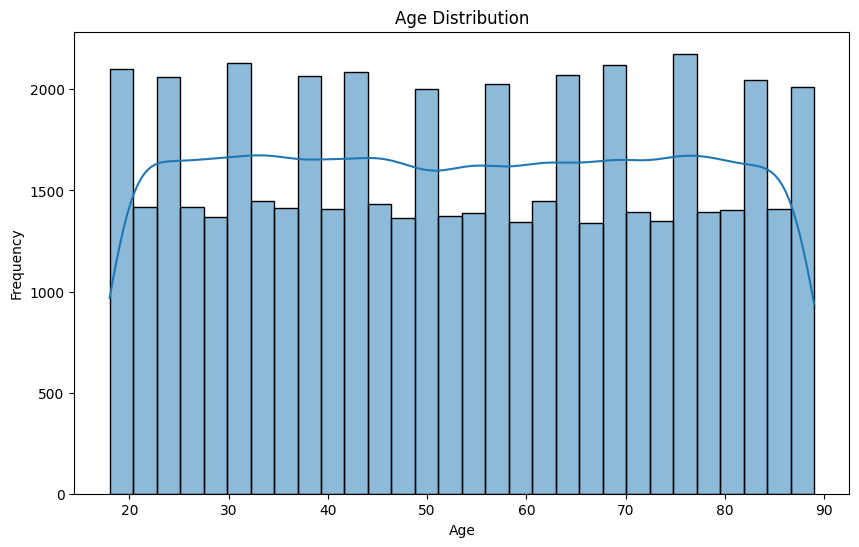

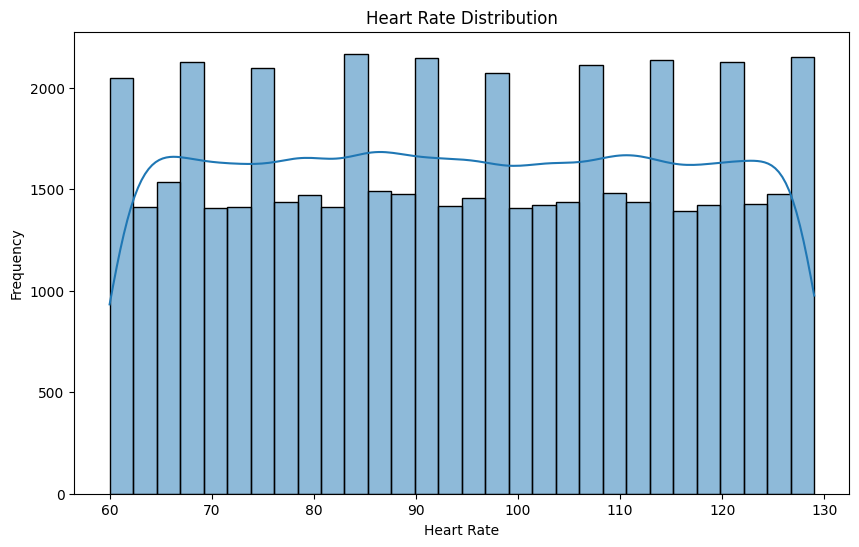

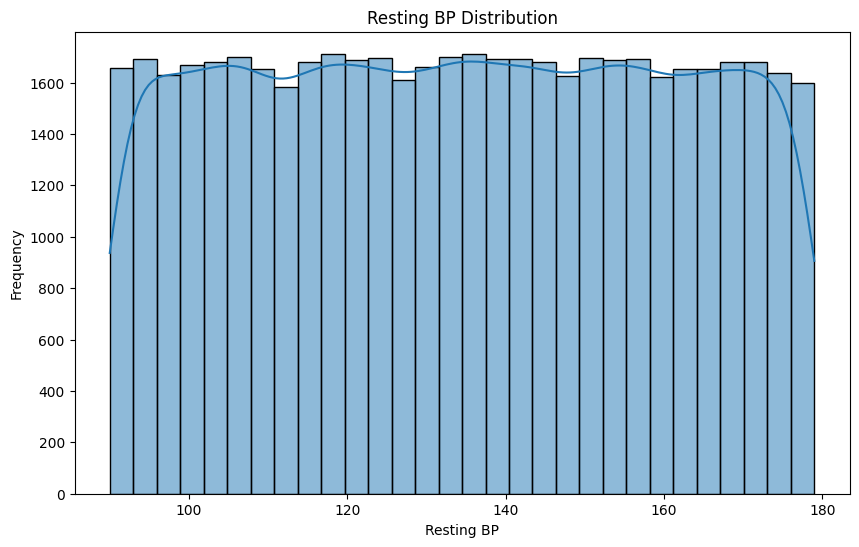

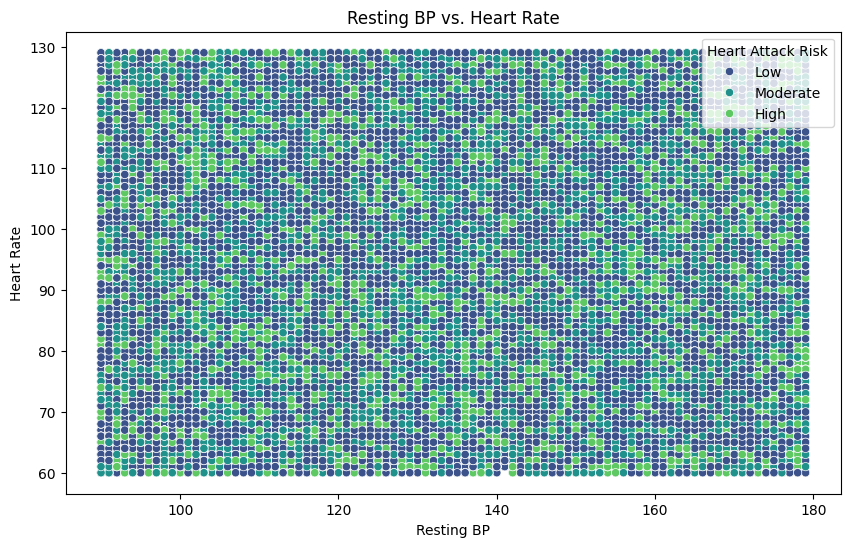

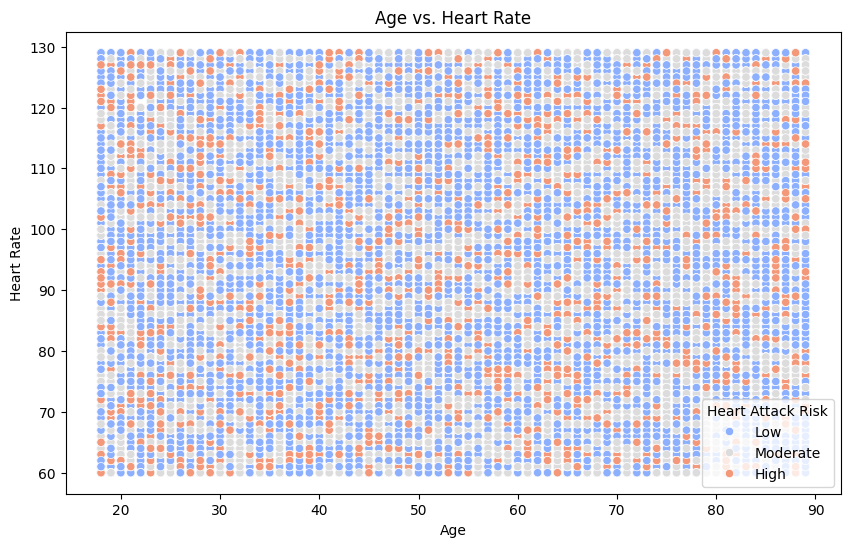

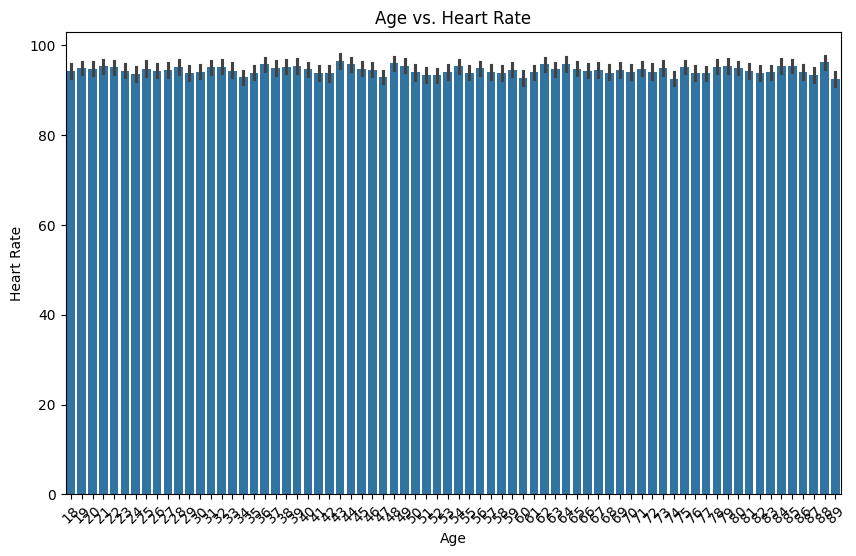

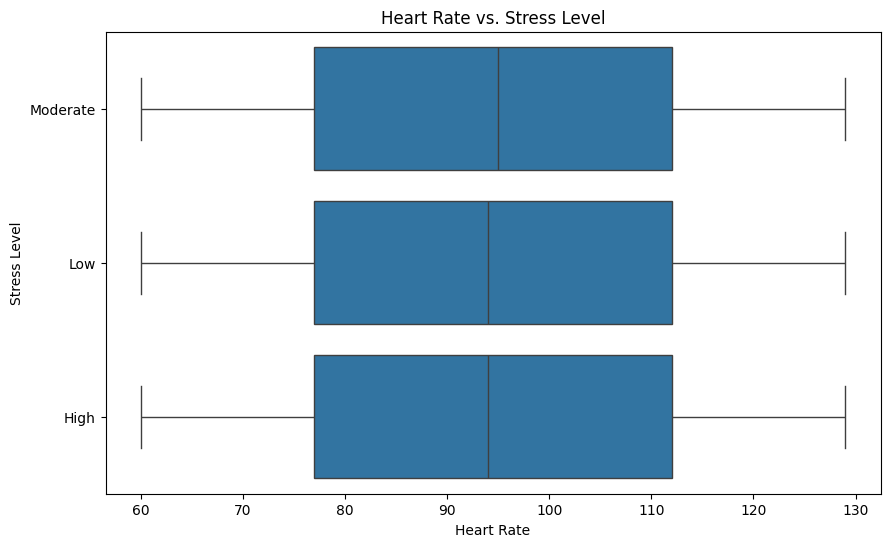

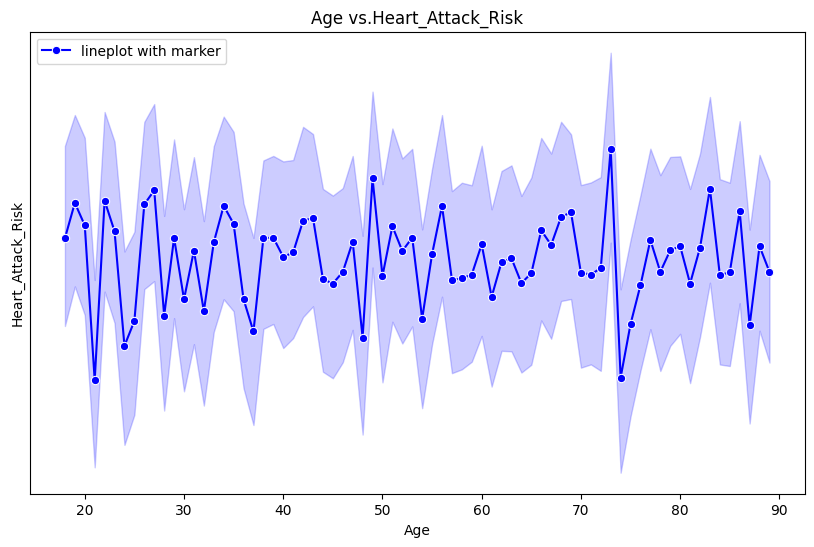

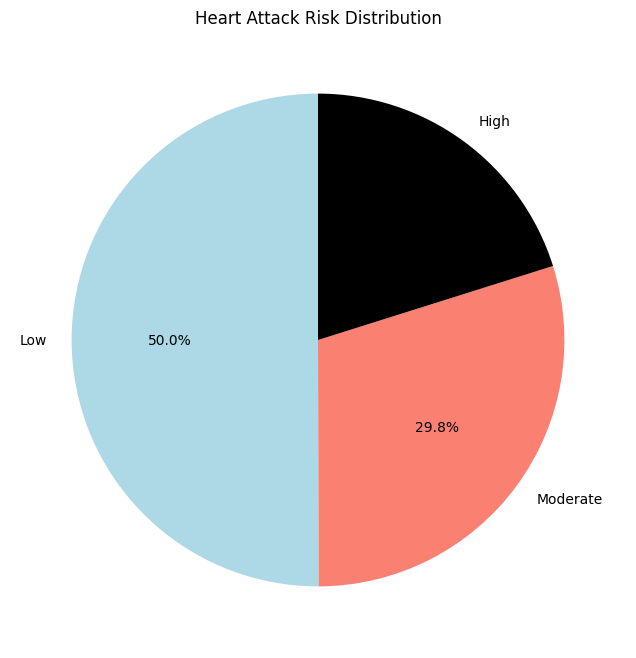

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv(r"/content/drive/My Drive/hi2.csv")

# Display the first 200 rows of the dataset
df.head(200)

# Plot 1: Histogram of Age with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Histogram of Heart Rate with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart_Rate'], kde=True, bins=30)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Histogram of Resting BP with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Resting_BP'], kde=True, bins=30)
plt.title('Resting BP Distribution')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Scatterplot of Resting_BP vs. Heart_Rate, colored by Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Resting_BP", y="Heart_Rate", hue="Heart_Attack_Risk", palette='viridis')
plt.title('Resting BP vs. Heart Rate')
plt.xlabel('Resting BP')
plt.ylabel('Heart Rate')
plt.legend(title="Heart Attack Risk")
plt.show()

# Plot 5: Scatterplot of Age vs. Heart_Rate, colored by Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Heart_Rate", hue="Heart_Attack_Risk", palette='coolwarm')
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(title="Heart Attack Risk")
plt.show()

# Plot 6: Bar plot of Age vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y="Heart_Rate", data=df)  # ci=None to avoid confidence intervals
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plot 7: Box plot of Heart Rate vs. Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart_Rate', y="Stress_Level", data=df)
plt.title('Heart Rate vs. Stress Level')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Age",y="Heart_Attack_Risk", label="lineplot with marker", color="blue", marker="o" )
plt.title('Age vs.Heart_Attack_Risk')
plt.xlabel('Age')
plt.ylabel('Heart_Attack_Risk')
plt.show()
# Count the occurrences of each unique value in the 'Heart_Attack_Risk' column
risk_counts = df['Heart_Attack_Risk'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon','black'])
plt.title('Heart Attack Risk Distribution')
plt.show()

In [2]:
import pandas as pd
from scipy.stats import zscore
df = pd.read_csv(r"/content/drive/MyDrive/hi2.csv")
# Calculate Z-scores for each numeric column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        z_scores = zscore(df[col])
        print(f"Z-scores for column '{col}':")
        print(z_scores)


# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply the function to remove outliers
df_no_outliers_iqr = remove_outliers_iqr(df)



# Function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=1):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            z_scores = zscore(df[col])
            df = df[abs(z_scores) <= threshold]

    return df

# Apply the function to remove outliers
df_no_outliers_zscore = remove_outliers_zscore(df)



print("Original DataFrame:")
print(df)
print("\n\n\n\n")
print("\nDataFrame after removing outliers:")
print(df_no_outliers_iqr)
print("\n\n\n\n")
print("\nDataFrame after removing outliers using Z-score:")
print(df_no_outliers_zscore)
print("\n\n\n\n")
output_path = r"/content/drive/MyDrive/hi2.csv"
df_no_outliers_iqr.to_csv(output_path, index=False)
output_path = r"/content/drive/MyDrive/hi2.csv"
df_no_outliers_zscore.to_csv(output_path, index=False)

Z-scores for column 'Age':
0        0.750106
1       -1.028843
2        1.711700
3        1.182823
4       -0.740365
           ...   
49995   -1.557720
49996   -0.884604
49997   -0.355727
49998    0.125070
49999    0.894345
Name: Age, Length: 50000, dtype: float64
Z-scores for column 'Smoking':
0        1.533291
1       -0.652192
2       -0.652192
3       -0.652192
4        1.533291
           ...   
49995   -0.652192
49996   -0.652192
49997   -0.652192
49998   -0.652192
49999   -0.652192
Name: Smoking, Length: 50000, dtype: float64
Z-scores for column 'Alcohol_Consumption':
0       -0.819869
1       -0.819869
2        1.219707
3        1.219707
4       -0.819869
           ...   
49995   -0.819869
49996   -0.819869
49997    1.219707
49998    1.219707
49999   -0.819869
Name: Alcohol_Consumption, Length: 50000, dtype: float64
Z-scores for column 'BMI':
0        0.981390
1       -0.660109
2        1.079658
3       -1.285706
4       -1.065640
           ...   
49995    1.717711
49996   -